<a href="https://colab.research.google.com/github/chiarasanguineti/students-performance/blob/main/students_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataset

In [ ]:
data = pd.read_csv("Stats survey.csv")
dataset = data.copy()

In [ ]:
dataset

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


# Data Cleaning

### Columns deletion

Elimination of columns I don't consider for analysis.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

In [ ]:
elim = ['Timestamp', 'Your Accommodation Status Last Year (2023)', 'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?', 'Do your parents approve alcohol consumption?', 'How strong is your relationship with your parent/s?']

# drop
dataset = dataset.drop(columns=elim)

In [ ]:
# check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          404 non-null    object 
 1   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 2   What year were you in last year (2023) ?                                                           333 non-null    object 
 3   What faculty does your degree fall under?                                                          399 non-null    object 
 4   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 320 non-null    float64

### Columns rename

Changing columns name to simplify the code.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          404 non-null    object 
 1   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 2   What year were you in last year (2023) ?                                                           333 non-null    object 
 3   What faculty does your degree fall under?                                                          399 non-null    object 
 4   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 320 non-null    float64

In [ ]:
# renaming columns
dataset.rename(columns={'Your Sex?': 'Sex'}, inplace=True)
dataset.rename(columns={'Your Matric (grade 12) Average/ GPA (in %)': 'Matric_Avg'}, inplace=True)
dataset.rename(columns={'What year were you in last year (2023) ?': 'Study_Year'}, inplace=True)
dataset.rename(columns={'What faculty does your degree fall under?': 'Faculty'}, inplace=True)
dataset.rename(columns={'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)': 'Study_Year_Avg'}, inplace=True)
dataset.rename(columns={'Additional amount of studying (in hrs) per week': 'Wkly_Stdy_Hrs'}, inplace=True)
dataset.rename(columns={'How often do you go out partying/socialising during the week?': 'Socializing_Freq'}, inplace=True)
dataset.rename(columns={'On a night out, how many alcoholic drinks do you consume?': 'Drinks_per_Night'}, inplace=True)
dataset.rename(columns={'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)': 'Missed_Classes'}, inplace=True)
dataset.rename(columns={'How many modules have you failed thus far into your studies?': 'Failed_Modules'}, inplace=True)
dataset.rename(columns={'Are you currently in a romantic relationship?': 'Relationship'}, inplace=True)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Sex                                                             404 non-null    object 
 1   Matric_Avg                                                      399 non-null    float64
 2   Study_Year                                                      333 non-null    object 
 3   Faculty                                                         399 non-null    object 
 4   Study_Year_Avg                                                  320 non-null    float64
 5   Wkly_Stdy_Hrs                                                   403 non-null    object 
 6   How often do you go out partying/socialising during the week?   404 non-null    object 
 7   Drinks_per_Night                                     

In [ ]:
dataset = dataset.rename({dataset.columns[6]: 'Socializing_freq'}, axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               404 non-null    object 
 1   Matric_Avg        399 non-null    float64
 2   Study_Year        333 non-null    object 
 3   Faculty           399 non-null    object 
 4   Study_Year_Avg    320 non-null    float64
 5   Wkly_Stdy_Hrs     403 non-null    object 
 6   Socializing_freq  404 non-null    object 
 7   Drinks_per_Night  404 non-null    object 
 8   Missed_Classes    403 non-null    object 
 9   Failed_Modules    403 non-null    object 
 10  Relationship      403 non-null    object 
dtypes: float64(2), object(9)
memory usage: 35.0+ KB


### Null values

Managing null values.


In [ ]:
dataset.isnull().sum()

Sex                  2
Matric_Avg           7
Study_Year          73
Faculty              7
Study_Year_Avg      86
Wkly_Stdy_Hrs        3
Socializing_freq     2
Drinks_per_Night     2
Missed_Classes       3
Failed_Modules       3
Relationship         3
dtype: int64

For quantitative variables (i.e Matric_Avg, Study_Year_Avg) I calculate the average of the values within the column and replace the null values with that value.

For categorical variables (i.e. Sex, Faculty, ..) I calculate the mode(the most frequent value), and replace the null value with that specific value.

In [ ]:
dataset['Sex'].describe()

count      404
unique       2
top       Male
freq       216
Name: Sex, dtype: object

In [ ]:
# Sex
moda_sex = dataset['Sex'].mode()[0]

# filling null values with fillna
dataset['Sex'].fillna(moda_sex, inplace=True)

In [ ]:
# Matric_Avg
media_m_avg = dataset['Matric_Avg'].mean()

dataset['Matric_Avg'].fillna(media_m_avg, inplace=True)

In [ ]:
# Study_Year
moda_s_y= dataset['Study_Year'].mode()[0]

dataset['Study_Year'].fillna(moda_s_y, inplace=True)

In [ ]:
# Faculty
moda_faculty = dataset['Faculty'].mode()[0]

dataset['Faculty'].fillna(moda_faculty, inplace=True)

In [ ]:
# Study_Year_Avg
media_s_y_avg = dataset['Study_Year_Avg'].mean()

dataset['Study_Year_Avg'].fillna(media_s_y_avg, inplace=True)

In [ ]:
# Wkly_Stdy_Hrs
moda_w_s_h = dataset['Wkly_Stdy_Hrs'].mode()[0]

dataset['Wkly_Stdy_Hrs'].fillna(moda_w_s_h, inplace=True)

In [ ]:
# Socializing_Freq
moda_socializing = dataset['Socializing_freq'].mode()[0]

dataset['Socializing_freq'].fillna(moda_socializing, inplace=True)

In [ ]:
# Drinks_per_Night
moda_drinks= dataset['Drinks_per_Night'].mode()[0]

dataset['Drinks_per_Night'].fillna(moda_drinks, inplace=True)

In [ ]:
# Missed_Classes
moda_classes = dataset['Missed_Classes'].mode()[0]

dataset['Missed_Classes'].fillna(moda_classes, inplace=True)

In [ ]:
# Failed_Modules
moda_modules = dataset['Failed_Modules'].mode()[0]

dataset['Failed_Modules'].fillna(moda_modules, inplace=True)

In [ ]:
# Relatioship
moda_relationship = dataset['Relationship'].mode()[0]

# Sostituiamo i valori nulli con la moda calcolata
dataset['Relationship'].fillna(moda_relationship, inplace=True)

In [ ]:
# check
dataset.isnull().sum()

Sex                 0
Matric_Avg          0
Study_Year          0
Faculty             0
Study_Year_Avg      0
Wkly_Stdy_Hrs       0
Socializing_freq    0
Drinks_per_Night    0
Missed_Classes      0
Failed_Modules      0
Relationship        0
dtype: int64

# Univariate data analysis

To understand the students I am analysing I do a univariate analysis of the data, so I understand how many male/female students I have, what kind of faculty they do etc..

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               406 non-null    object 
 1   Matric_Avg        406 non-null    float64
 2   Study_Year        406 non-null    object 
 3   Faculty           406 non-null    object 
 4   Study_Year_Avg    406 non-null    float64
 5   Wkly_Stdy_Hrs     406 non-null    object 
 6   Socializing_freq  406 non-null    object 
 7   Drinks_per_Night  406 non-null    object 
 8   Missed_Classes    406 non-null    object 
 9   Failed_Modules    406 non-null    object 
 10  Relationship      406 non-null    object 
dtypes: float64(2), object(9)
memory usage: 35.0+ KB


In [ ]:
dataset['Sex'].describe()

count      406
unique       2
top       Male
freq       218
Name: Sex, dtype: object

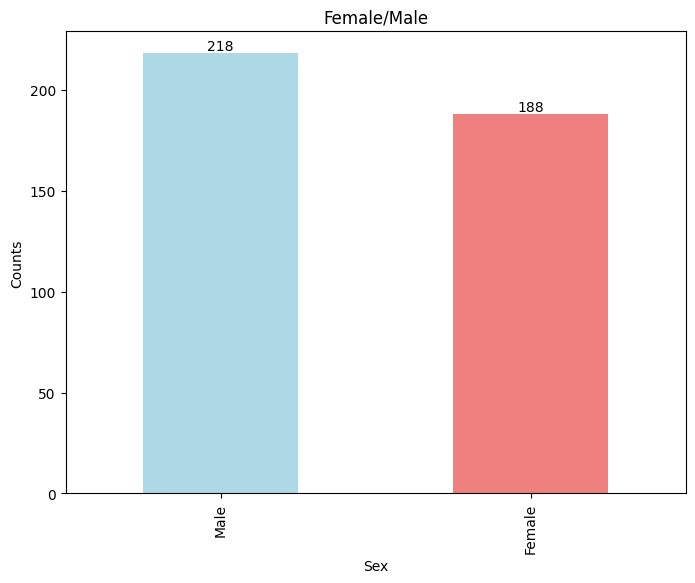

In [ ]:
counts_sex = dataset['Sex'].value_counts()

# bar chart - Sex
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightcoral']
counts_sex.plot(kind='bar', color=colors)

for i, count in enumerate(counts_sex):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Female/Male')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

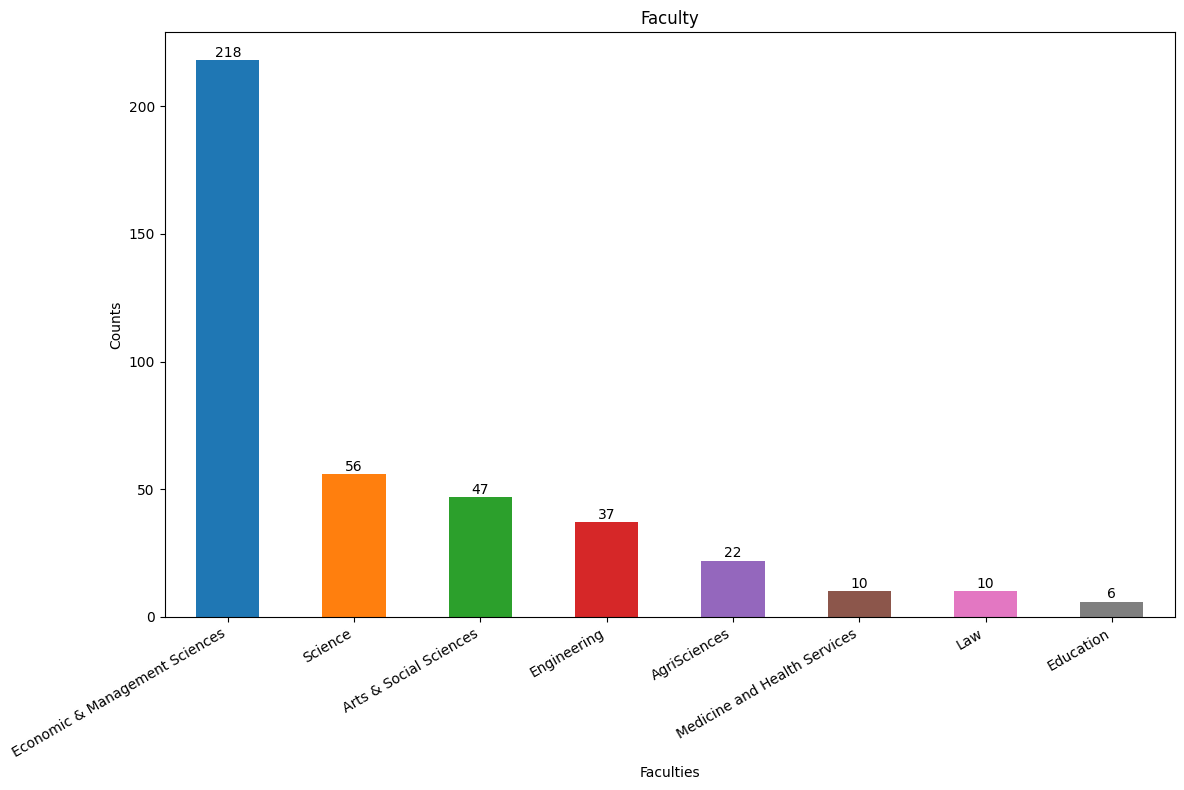

In [ ]:
# Faculty
counts_faculty = dataset['Faculty'].value_counts()

num_faculties = len(counts_faculty)
colors = plt.cm.tab10.colors[:num_faculties]  # first 10 colors palette 'tab10'

# bar chart
plt.figure(figsize=(12, 8))
counts_faculty.plot(kind='bar', color=colors)

for i, count in enumerate(counts_faculty):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Faculty')
plt.xlabel('Faculties')
plt.ylabel('Counts')

plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

I am talking about students who are overwhelmingly male (218 out of 406) and the vast majority of the total number of students attending the Economic & Management Sciences faculty (218 out of 406).


In [ ]:
dataset['Study_Year_Avg'].describe()

count    406.000000
mean      66.268469
std        8.118757
min       30.000000
25%       61.000000
50%       66.268469
75%       70.000000
max       95.220000
Name: Study_Year_Avg, dtype: float64

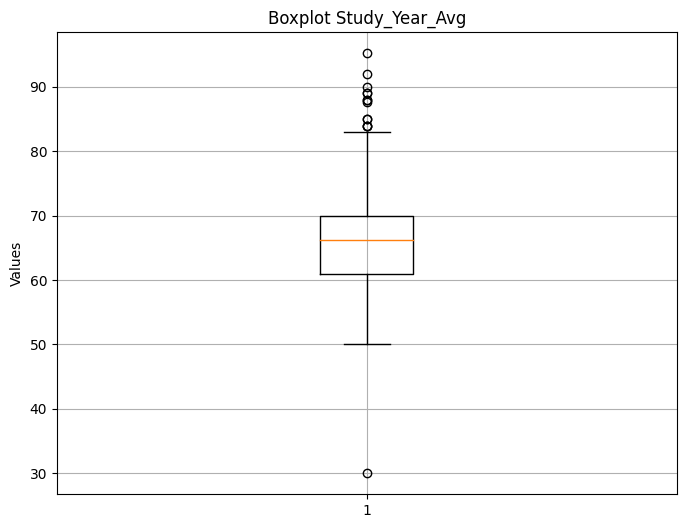

In [ ]:
# box plot Study_Year_Avg
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Study_Year_Avg'], vert=True)

plt.title('Boxplot Study_Year_Avg')
plt.ylabel('Values')
plt.grid(True)
plt.show()

To understand the distribution of Study_Year_Avg I make a box plot.

The average grade obtained by the students is about 66, the values that deviate significantly from the distribution of these grades (outliers) are 30 and some values greater than 82.

50% of the students have a grade between 61 and 70.

# Bivariate analysis and statistical tests

### Study_Year_Avg VS Sex

<ipython-input-200-7caf613e79ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Sex', y='Study_Year_Avg', palette='Set2')


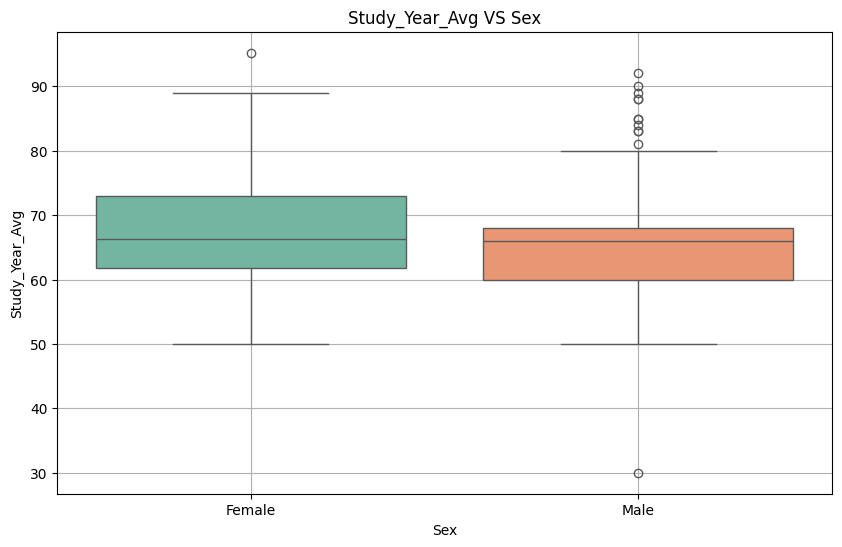

In [ ]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Sex', y='Study_Year_Avg', palette='Set2')
plt.title('Study_Year_Avg VS Sex')
plt.xlabel('Sex')
plt.ylabel('Study_Year_Avg')
plt.grid(True)
plt.show()

From the box plot I see that the median between the male and female vote is more or less the same, but they have a very different distribution. To better understand if there is a statistically significant difference I try some tests.

In particular, I perform a simple linear regression using the statsmodels module in Python.

In [ ]:
# replace Sex values.
# 'Female' = 1,  'Male' = 0
dataset['Sex'] = dataset['Sex'].replace({'Female': 1, 'Male': 0})

# definition of independent (X) and dependent (Y) variables
X = dataset['Sex']  # independent variable (sex of students)
Y = dataset['Study_Year_Avg']  # dependent variable

# adding a constant to the model (intercept)
X = sm.add_constant(X)

# creation of the linear regression model
model = sm.OLS(Y, X).fit()

# print model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.034
Date:                Fri, 03 May 2024   Prob (F-statistic):             0.0145
Time:                        13:14:25   Log-Likelihood:                -1422.8
No. Observations:                 406   AIC:                             2850.
Df Residuals:                     404   BIC:                             2858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3550      0.546    119.591      0.0

Interpretation of the results of the linear regression analysis:

- R-squared: The R-squared measures the percentage of variation in the dependent variable (Study_Year_Avg) that is explained by the model. In this case, the R-squared is 0.015, indicating that only about 1.5% of the variation in grades can be explained by the sex of the students.

- Sex coefficient (Sex): The sex coefficient (Sex) is 1.9727. This indicates that, on average, school grades are about 1.9727 points higher for female students than for male students.

- P-value: The p-value associated with the sex coefficient is 0.014, which is below the 5% significance level. This indicates that the sex of the students is a significant predictor of school grades.

In summary, according to this regression model, students' gender has a significant impact on their school grades. However, the very low R-squared suggests that there are other factors not included in the model that influence school grades to a greater extent.

### Study_Year_Avg  VS Wkly_Stdy_Hours

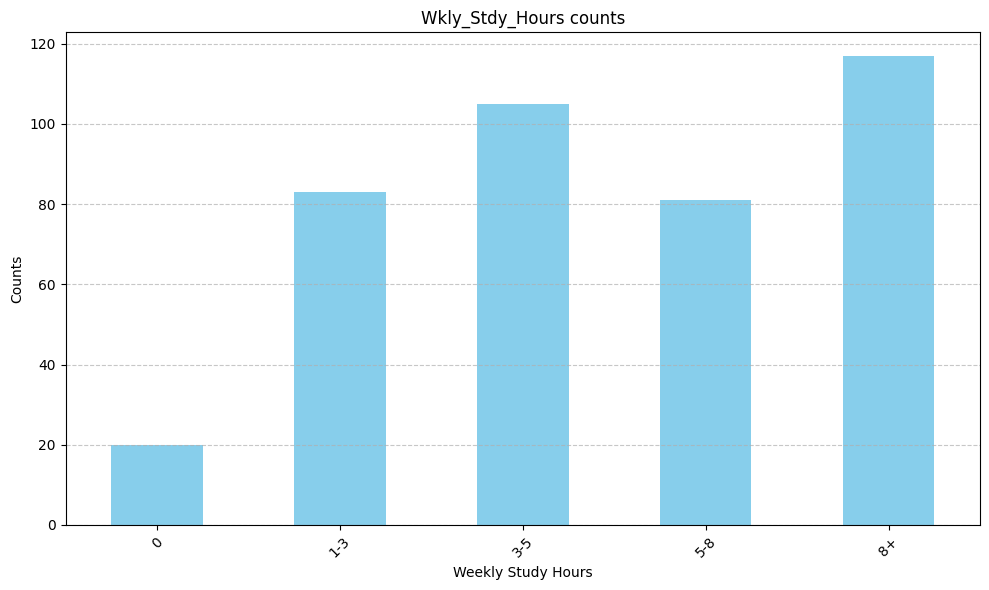

In [ ]:
study_hours_counts = dataset['Wkly_Stdy_Hrs'].value_counts()
study_hours_counts_sorted = study_hours_counts.sort_index()

plt.figure(figsize=(10, 6))
study_hours_counts_sorted.plot(kind='bar', color='skyblue')  # study_hours_counts_sorted
plt.title('Wkly_Stdy_Hours counts')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-203-9be65bc40994>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Wkly_Stdy_Hrs', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')


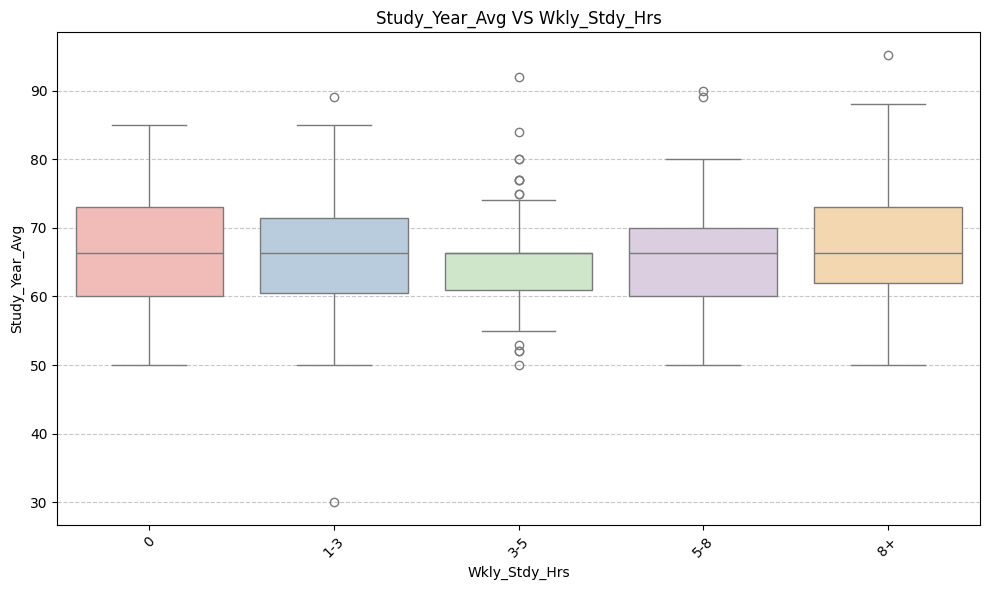

In [ ]:
# box plots Study_Year_Avg VS Wkly_Stdy_Hrs
dataset_sorted = dataset.sort_values(by='Wkly_Stdy_Hrs')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Wkly_Stdy_Hrs', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')
plt.title('Study_Year_Avg VS Wkly_Stdy_Hrs')
plt.xlabel('Wkly_Stdy_Hrs')
plt.ylabel('Study_Year_Avg')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
dataset['Wkly_Stdy_Hrs'] = dataset['Wkly_Stdy_Hrs'].replace({
    '0': 0,
    '1-3': 1,
    '3-5': 2,
    '5-8': 3,
    '8+': 4
})

# linear regression analysis
X = dataset['Wkly_Stdy_Hrs'] #independent variable
Y = dataset['Study_Year_Avg'] #dependent variable

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2446
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.621
Time:                        13:14:26   Log-Likelihood:                -1425.7
No. Observations:                 406   AIC:                             2855.
Df Residuals:                     404   BIC:                             2863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            65.8697      0.902     73.065

- R-squared (R²): The R-squared is a measure of the goodness of fit of the model. In this case, the R-squared is very low at 0.001, indicating that only 0.1% of the variation in school grades can be explained by the number of study hours per week.

- Coefficient of Wkly_Stdy_Hrs: The coefficient associated with 'Wkly_Stdy_Hrs' is 0.1612. This indicates that, on average, a one-unit increase in weekly study hours is associated with an increase of approximately 0.1612 points in school grades. However, since the p-value associated with this coefficient is 0.621 (above the standard significance level of 0.05), we cannot consider this relationship as statistically significant.

In summary, the analysis suggests that there is no statistical evidence that the number of study hours per week significantly influences school grades.

### Study_Year_Avg VS Faculty

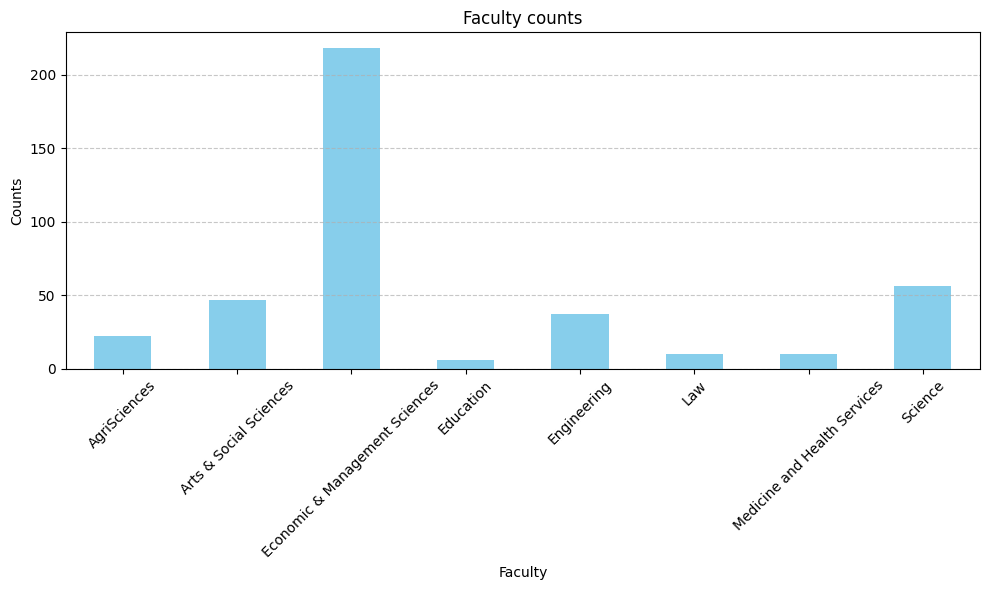

In [ ]:
faculty_counts = dataset['Faculty'].value_counts()
faculty_counts_sorted = faculty_counts.sort_index()

plt.figure(figsize=(10, 6))
faculty_counts_sorted.plot(kind='bar', color='skyblue')  # study_hours_counts_sorted
plt.title('Faculty counts')
plt.xlabel('Faculty')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-206-57c48e2f4543>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Faculty', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')


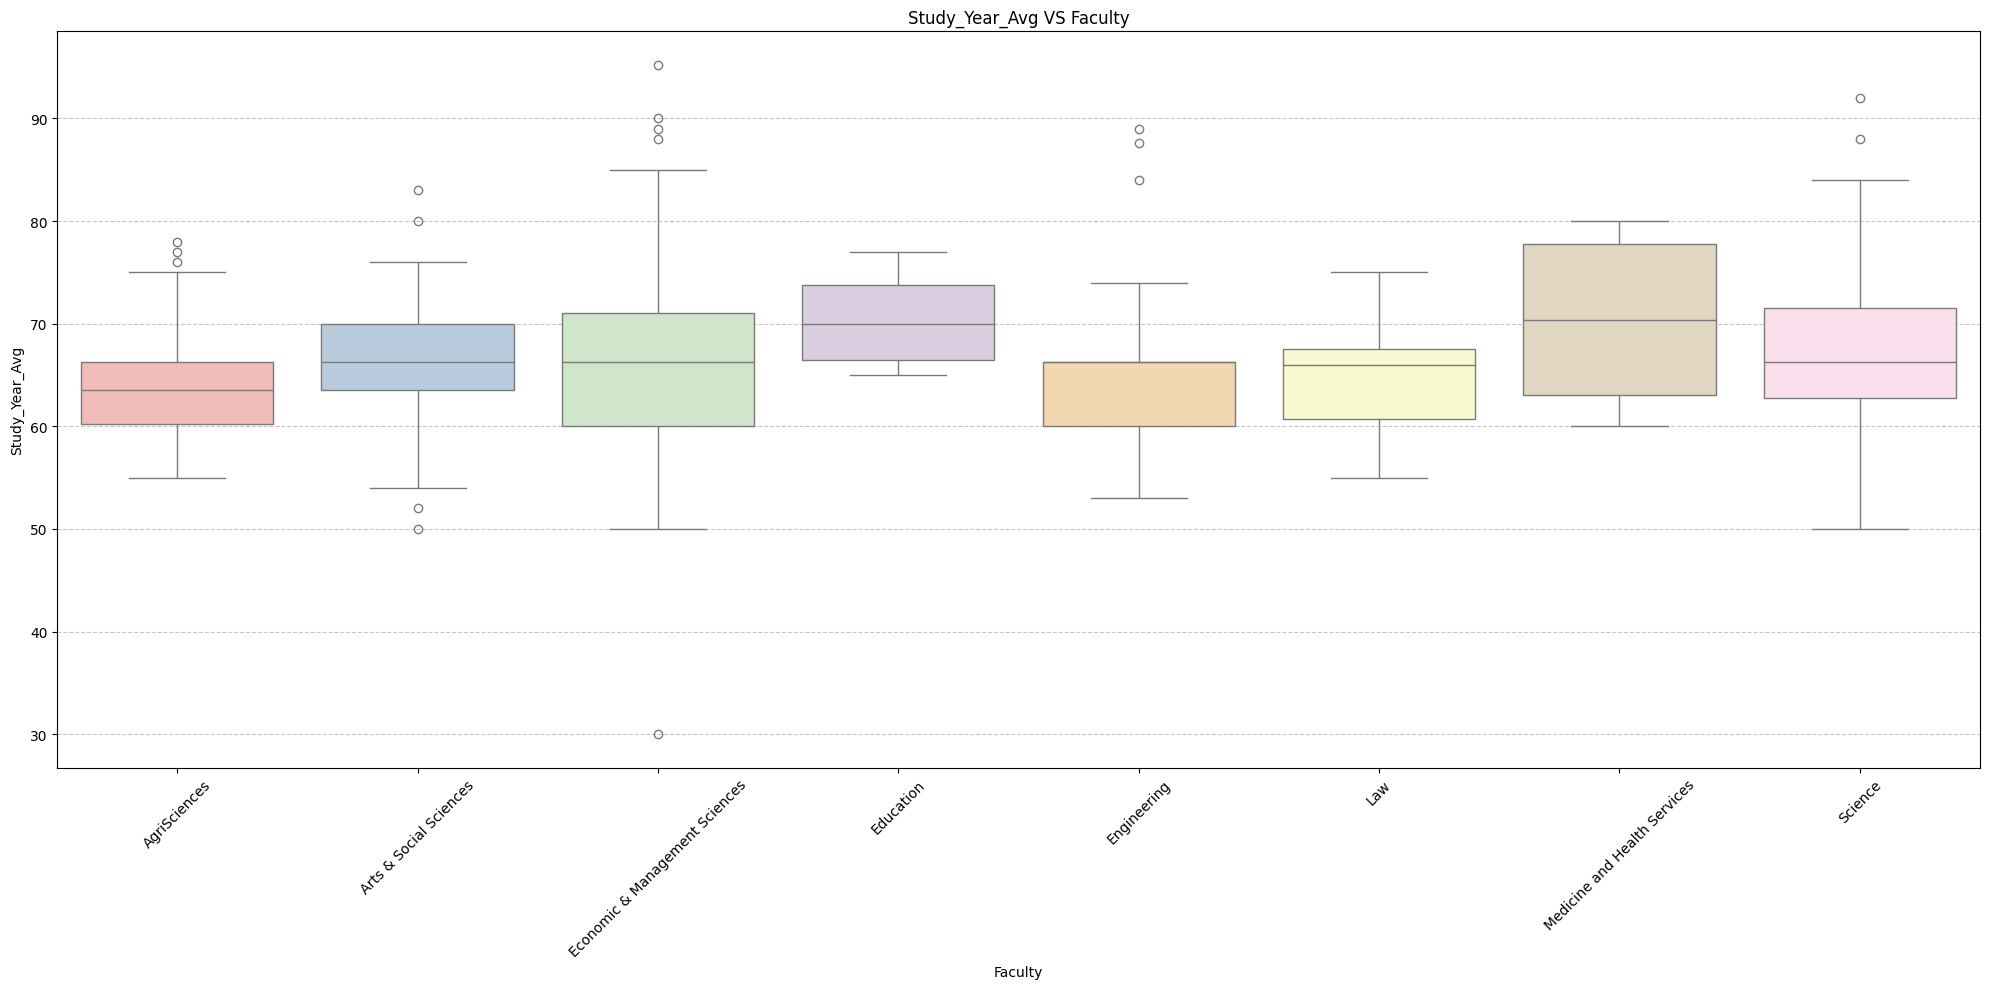

In [ ]:
# box plots Study_Year_Avg VS Faculty
dataset_sorted = dataset.sort_values(by='Faculty')

plt.figure(figsize=(20, 10))
sns.boxplot(x='Faculty', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')
plt.title('Study_Year_Avg VS Faculty')
plt.xlabel('Faculty')
plt.ylabel('Study_Year_Avg')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
dataset['Faculty'] = dataset['Faculty'].replace({
    'AgriSciences': 0,
    'Arts & Social Sciences': 1,
    'Economic & Management Sciences': 2,
    'Education': 3,
    'Engineering': 4,
    'Law': 5,
    'Medicine and Health Services': 6,
    'Military Science' : 7,
    'Science' : 8,
    'Theology' : 9
})

# linear regression analysis
X = dataset['Faculty'] #independent variable
Y = dataset['Study_Year_Avg'] #dependent variable

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8395
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.360
Time:                        13:14:27   Log-Likelihood:                -1425.4
No. Observations:                 406   AIC:                             2855.
Df Residuals:                     404   BIC:                             2863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7937      0.656    100.230      0.0

- Regression coefficient for "Faculty": The regression coefficient for "Faculty" is 0.1597. This value represents the expected change in the dependent variable ("Study_Year_Avg") for a unit increase in the independent variable ("Faculty"). However, as the p-value associated with this coefficient is 0.360, we cannot consider this result to be statistically significant. In other words, there is no evidence that there is a significant linear association between faculty and average years of study.
- R-squared: The R-squared coefficient measures the percentage of variation in the dependent variable that is explained by the model. In this case, the value of R-squared is very low (0.002), indicating that the linear regression model is not able to significantly explain the variation in the mean years of study.

In conclusion, the analysis suggests that faculty affiliation does not have a significant impact on the average years of study in your dataset. You may need to explore other variables or models to better understand the factors influencing the average years of study.

### Study_Year_Avg VS Study_Year

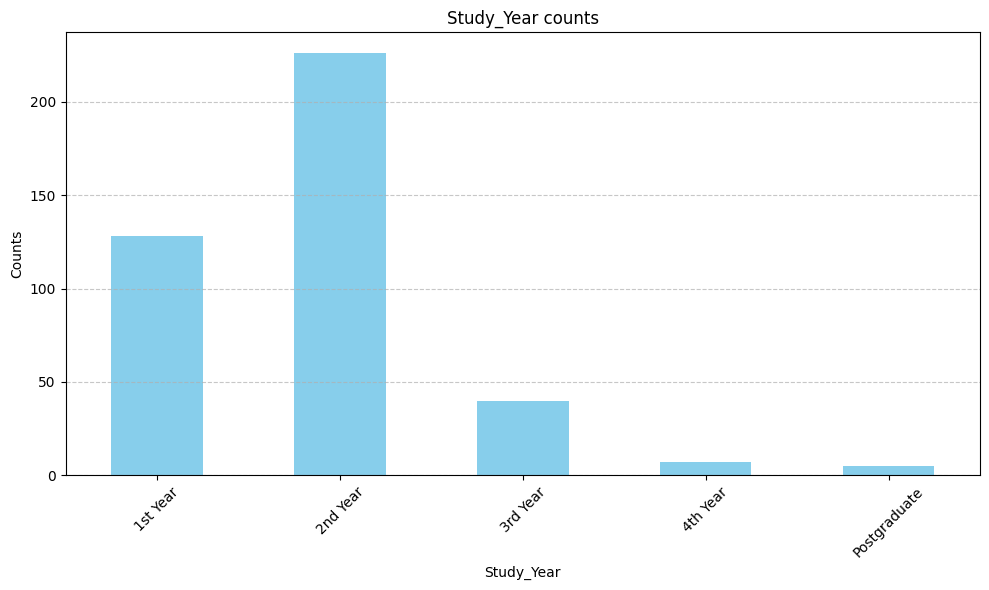

In [ ]:
study_year_counts = dataset['Study_Year'].value_counts()
study_year_counts_sorted = study_year_counts.sort_index()

plt.figure(figsize=(10, 6))
study_year_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Study_Year counts')
plt.xlabel('Study_Year')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-209-0f620400c617>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Study_Year', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')


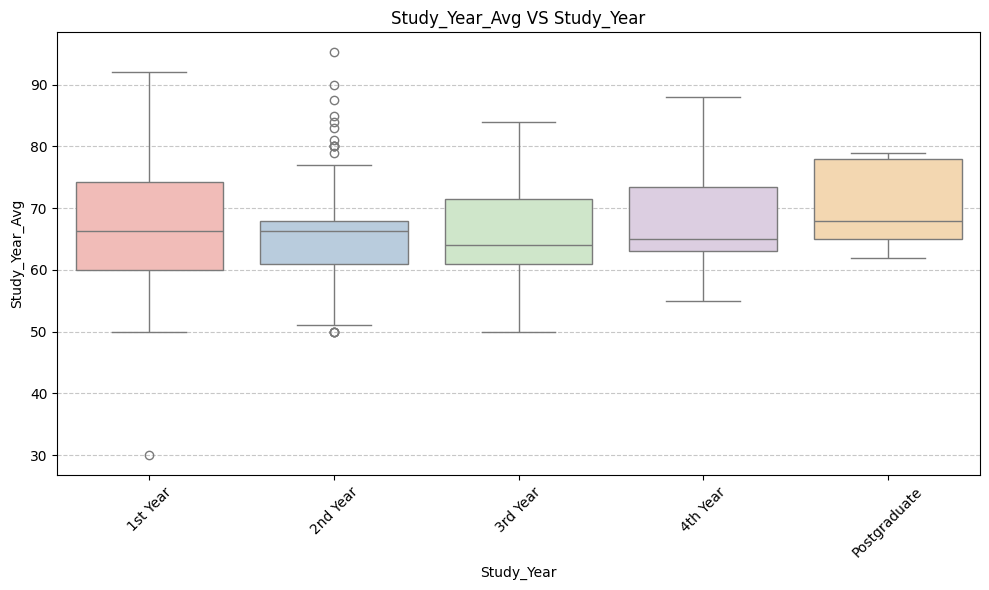

In [ ]:
# box plots Study_Year_Avg VS Study_Year
dataset_sorted = dataset.sort_values(by='Study_Year')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Study_Year', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')
plt.title('Study_Year_Avg VS Study_Year')
plt.xlabel('Study_Year')
plt.ylabel('Study_Year_Avg')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
dataset['Study_Year'] = dataset['Study_Year'].replace({
    '1st Year': 0,
    '2nd Year': 1,
    '3rd Year': 2,
    '4th Year': 3,
    'Postgraduate': 4
})

# linear regression analysis
X = dataset['Study_Year'] #independent variable
Y = dataset['Study_Year_Avg'] #dependent variable

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05801
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.810
Time:                        13:14:28   Log-Likelihood:                -1425.8
No. Observations:                 406   AIC:                             2856.
Df Residuals:                     404   BIC:                             2864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3782      0.609    109.071      0.0

- Regression coefficient for "Study_Year": The regression coefficient for "Study_Year" is -0.1284. This value represents the expected change in the dependent variable ("Study_Year") for a unit increase in the independent variable ("Study_Year"). However, as the p-value associated with this coefficient is very high (0.810), we cannot consider this result to be statistically significant. In other words, there is no evidence of a significant linear association between study year and mean study year.
- R-squared: The R-squared coefficient measures the percentage of variation in the dependent variable that is explained by the model. In this case, the value of R-squared is very low (0.000), indicating that the linear regression model is not able to significantly explain the variation in the mean of the study years.
- p-value of the F-test: The p-value of the F-test is 0.810, suggesting that the model as a whole is not statistically significant. In other words, there is insufficient evidence to reject the null hypothesis that all regression coefficients are equal to zero.

In summary, the analysis suggests that there is no significant linear relationship between year of study and average years of study in your dataset.

### Study_Year_Avg  VS Socializing_freq

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               406 non-null    int64  
 1   Matric_Avg        406 non-null    float64
 2   Study_Year        406 non-null    int64  
 3   Faculty           406 non-null    int64  
 4   Study_Year_Avg    406 non-null    float64
 5   Wkly_Stdy_Hrs     406 non-null    int64  
 6   Socializing_freq  406 non-null    object 
 7   Drinks_per_Night  406 non-null    object 
 8   Missed_Classes    406 non-null    object 
 9   Failed_Modules    406 non-null    object 
 10  Relationship      406 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 35.0+ KB


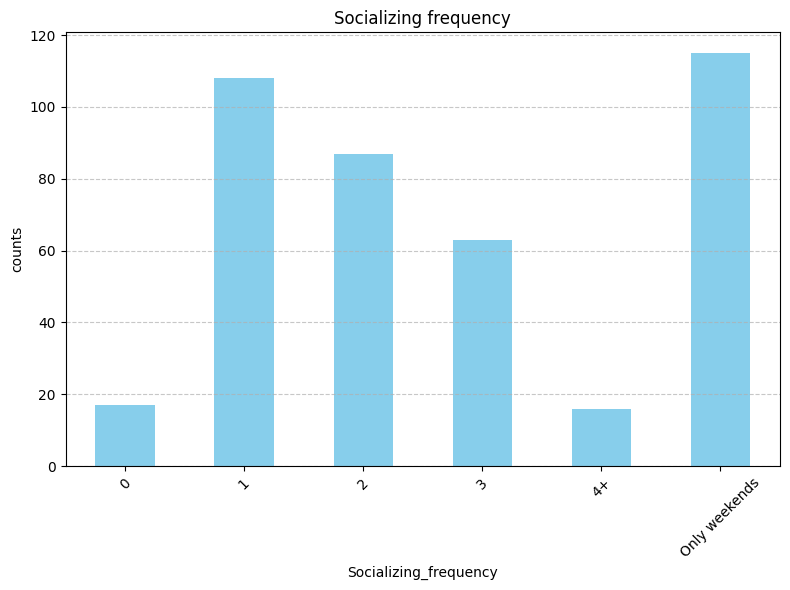

In [ ]:
social_counts = dataset['Socializing_freq'].value_counts()

social_counts_sorted = social_counts.sort_index()

# bar chart
plt.figure(figsize=(8, 6))
social_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Socializing frequency')
plt.xlabel('Socializing_frequency')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-213-e3f93cb34091>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Socializing_freq', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')


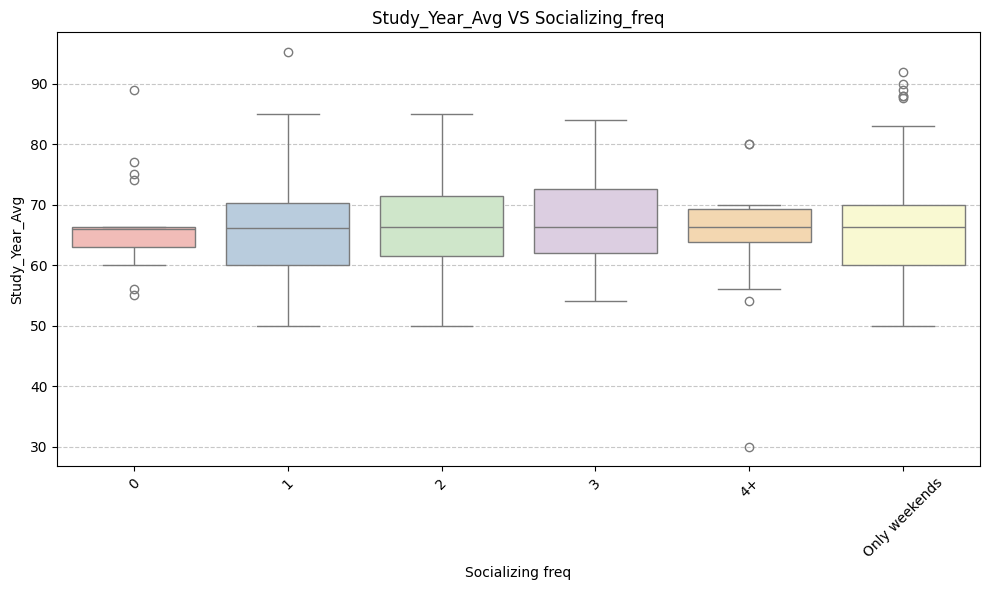

In [ ]:
#  box plot Study_Year_Avg VS Socialinzing_freq
dataset_sorted = dataset.sort_values(by='Socializing_freq')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Socializing_freq', y='Study_Year_Avg', data=dataset_sorted, palette='Pastel1')
plt.title('Study_Year_Avg VS Socializing_freq')
plt.xlabel('Socializing freq')
plt.ylabel('Study_Year_Avg')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
dataset['Socializing_freq'] = dataset['Socializing_freq'].replace({
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4,
    'Only weekends': 5
})

# linear regression analysis
X = dataset['Socializing_freq']
Y = dataset['Study_Year_Avg']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.09124
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.763
Time:                        13:14:29   Log-Likelihood:                -1425.8
No. Observations:                 406   AIC:                             2856.
Df Residuals:                     404   BIC:                             2864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               66.4691      0.777  

- R-squared (R²): The R-squared is very low at 0.000, indicating that 0% of the variation in school grades can be explained by the frequency of socialising.
- Coefficient of Socializing_freq: The coefficient associated with 'Socializing_freq' is -0.0734. This indicates that, on average, a one-unit increase in the frequency of socialising is associated with a decrease of approximately 0.0734 points in school grades. However, since the p-value associated with this coefficient is 0.763 (above the standard significance level of 0.05), we cannot consider this relationship to be statistically significant.

In summary, the analysis suggests that there is no statistical evidence that socialisation frequency significantly influences school grades.

### Study_Year_Avg  vs Drinks_per_Night

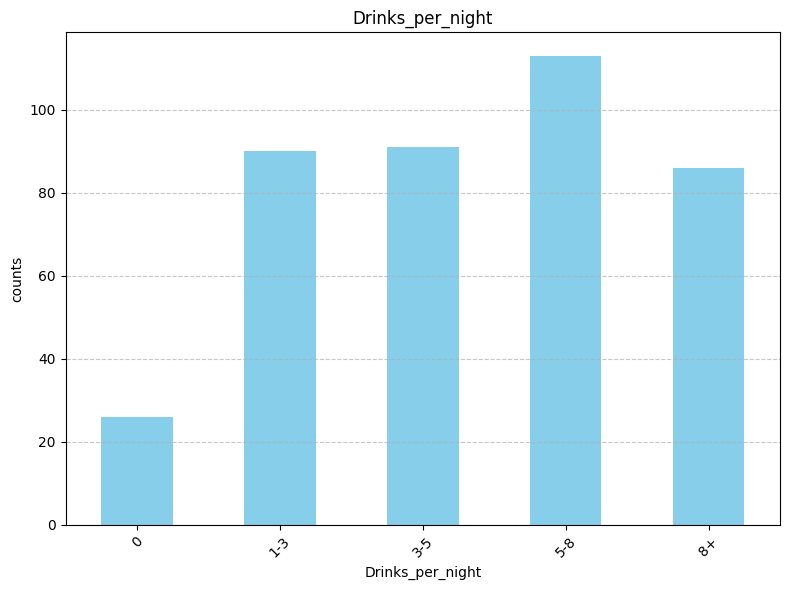

In [ ]:
drinks_counts = dataset['Drinks_per_Night'].value_counts()

drinks_counts_sorted = drinks_counts.sort_index()

# Crea il diagramma a barre
plt.figure(figsize=(8, 6))
drinks_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Drinks_per_night')
plt.xlabel('Drinks_per_night')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# linear regression

dataset['Drinks_per_Night'] = dataset['Drinks_per_Night'].replace({
    '0': 0,
    '1-3': 1,
    '3-5': 2,
    '5-8': 3,
    '8+': 4
})

X = dataset['Drinks_per_Night']
Y = dataset['Study_Year_Avg']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.827
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.177
Time:                        13:14:29   Log-Likelihood:                -1424.9
No. Observations:                 406   AIC:                             2854.
Df Residuals:                     404   BIC:                             2862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               67.3205      0.876  

- R-squared (R²): The R-squared is very low at 0.005, indicating that only 0.5% of the variation in school grades can be explained by the number of drinks per night.

- Coefficient of Drinks_per_Night: The coefficient associated with 'Drinks_per_Night' is -0.4473. This indicates that, on average, an increase of one drink per night is associated with a decrease of approximately 0.4473 points in school grades. However, since the p-value associated with this coefficient is 0.177 (above the standard significance level of 0.05), we cannot consider this relationship to be statistically significant.

In summary, the analysis suggests that there is no statistical evidence that the number of drinks per night significantly influences school grades.

### Study_Year_Avg  vs Missed_Classes

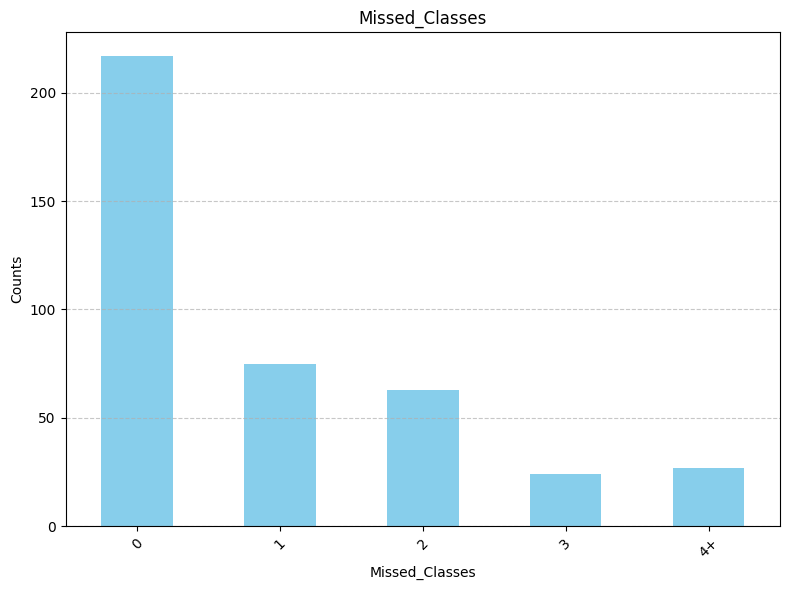

In [ ]:
miss_counts = dataset['Missed_Classes'].value_counts()


miss_counts_sorted = miss_counts.sort_index()

plt.figure(figsize=(8, 6))
miss_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Missed_Classes')
plt.xlabel('Missed_Classes')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# linear regression
dataset['Missed_Classes'] = dataset['Missed_Classes'].replace({
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4
})


X = dataset['Missed_Classes']
Y = dataset['Study_Year_Avg']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.069
Date:                Fri, 03 May 2024   Prob (F-statistic):             0.0443
Time:                        13:14:30   Log-Likelihood:                -1423.8
No. Observations:                 406   AIC:                             2852.
Df Residuals:                     404   BIC:                             2860.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             66.8847      0.504    132.

- R-squared (R²): The R-squared is very low at 0.010, indicating that only 1% of the variation in school grades can be explained by the variable 'Missed_Classes'.

- Coefficient of Missed_Classes: The coefficient associated with 'Missed_Classes' is -0.6566. This indicates that, on average, each missed class is associated with a decrease of approximately 0.6566 points in school grades. However, since the p-value associated with this coefficient is 0.044 (below the standard significance level of 0.05), we can consider this relationship as statistically significant.

In summary, the analysis suggests that there is statistical evidence that the number of missed classes significantly influences school grades.

### Study_Year_Avg vs Failed_Modules

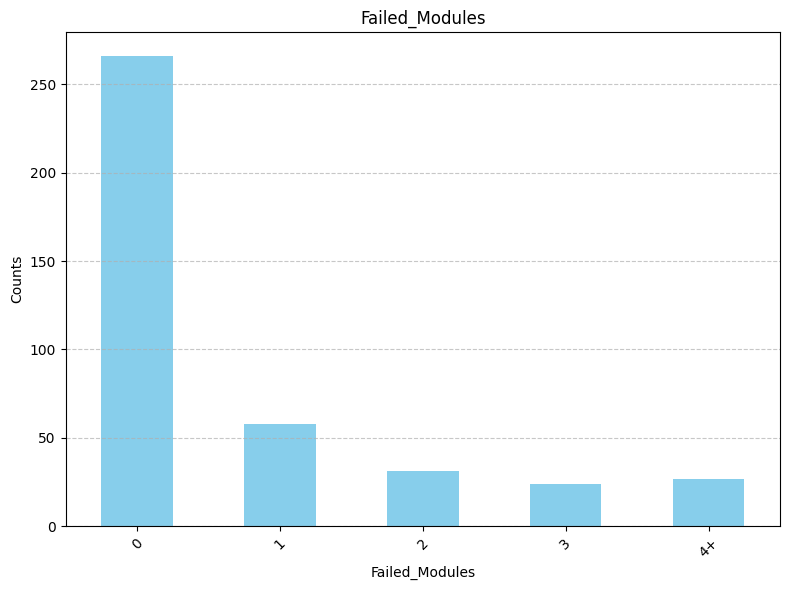

In [ ]:
failed_counts = dataset['Failed_Modules'].value_counts()

failed_counts_sorted = failed_counts.sort_index()

plt.figure(figsize=(8, 6))
failed_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Failed_Modules')
plt.xlabel('Failed_Modules')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# linear regression
dataset['Failed_Modules'] = dataset['Failed_Modules'].replace({
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4
})

X = dataset['Failed_Modules']
Y = dataset['Study_Year_Avg']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     79.95
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.39e-17
Time:                        13:14:31   Log-Likelihood:                -1389.2
No. Observations:                 406   AIC:                             2782.
Df Residuals:                     404   BIC:                             2790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             68.2580      0.431    158.

- R-squared (R²): The R-squared is quite significant at 0.165, indicating that approximately 16.5% of the variation in school grades can be explained by the number of failed modules.

- Coefficient of Failed_Modules: The coefficient associated with 'Failed_Modules' is -2.6925. This indicates that, on average, each failed module is associated with a decrease of approximately 2.6925 points in school grades. Since the p-value associated with this coefficient is 0.000 (below the standard significance level of 0.05), we can consider this relationship as statistically significant.

In summary, the analysis suggests that there is statistical evidence that the number of failed modules significantly influences school grades.

### Study_Year_Avg vs Relationship

<ipython-input-221-af136e3f42bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Relationship', y='Study_Year_Avg', data=dataset, palette='Pastel1')


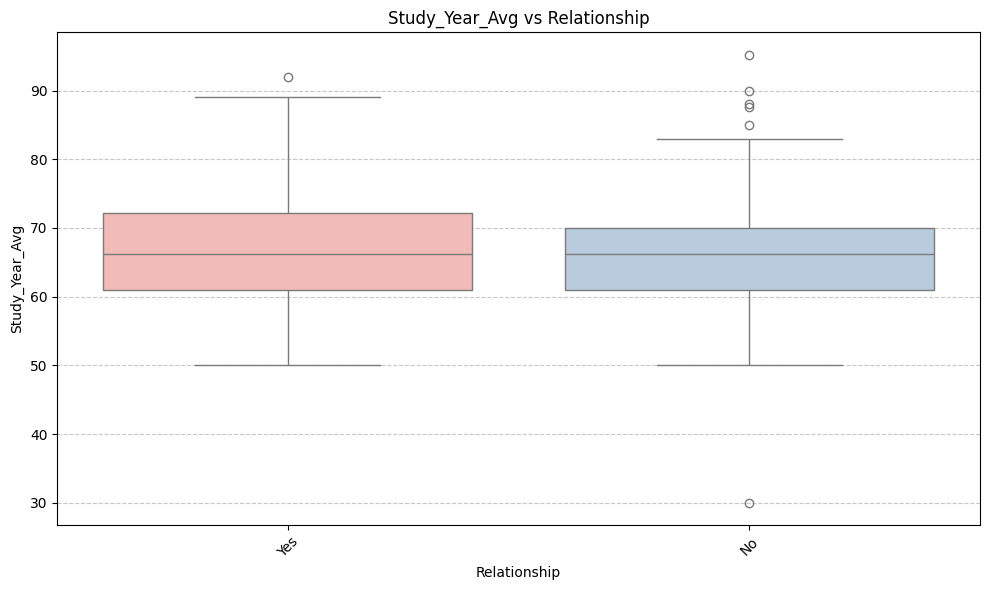

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Relationship', y='Study_Year_Avg', data=dataset, palette='Pastel1')
plt.title('Study_Year_Avg vs Relationship')
plt.xlabel('Relationship')
plt.ylabel('Study_Year_Avg')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
dataset['Relationship'] = dataset['Relationship'].replace({
    'Yes': 0,
    'No': 1
})

X = dataset['Relationship']
Y = dataset['Study_Year_Avg']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Study_Year_Avg   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.029
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.311
Time:                        13:14:32   Log-Likelihood:                -1425.3
No. Observations:                 406   AIC:                             2855.
Df Residuals:                     404   BIC:                             2863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           66.7649      0.634    105.316   

- R-squared (R²): The R-squared is very low at 0.003, indicating that only 0.3% of the variation in school grades can be explained by the variable 'Relationship'.

- Coefficient of Relationship: The coefficient associated with 'Relationship' is -0.8329. This indicates that, on average, being in a relationship is associated with a decrease of approximately 0.8329 points in school grades. However, since the p-value associated with this coefficient is 0.311 (above the standard significance level of 0.05), we cannot consider this relationship as statistically significant.

In summary, the analysis suggests that there is no statistical evidence that being in a relationship significantly influences school grades.

This could already be deduced by looking at the trend of the data in the box plot.

# Multivariate analysis

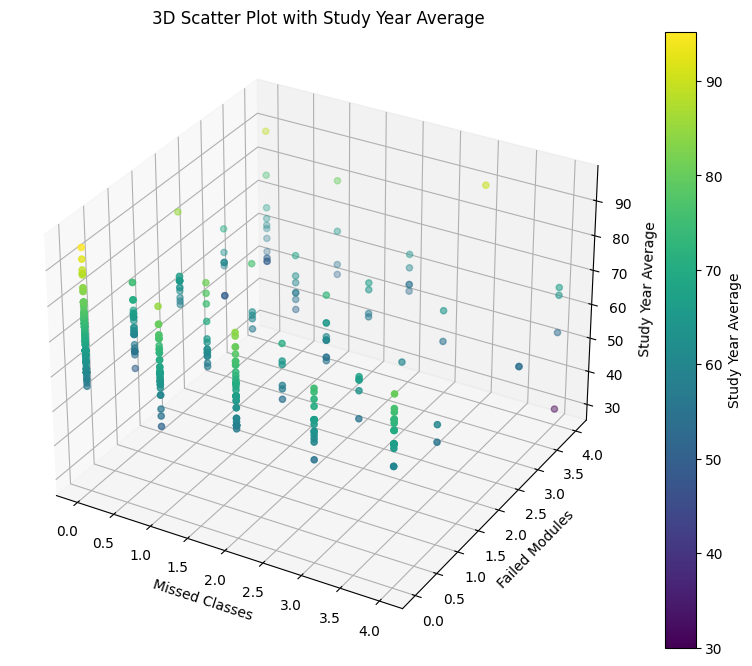

In [ ]:
X = dataset['Missed_Classes']
Y = dataset['Failed_Modules']
Z = dataset['Study_Year_Avg']

# three-dimensional graphic
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# three-dimensional scatter plot with colours
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o')

# bar colors
cbar = plt.colorbar(scatter)
cbar.set_label('Study Year Average')

ax.set_xlabel('Missed Classes')
ax.set_ylabel('Failed Modules')
ax.set_zlabel('Study Year Average')
ax.set_title('3D Scatter Plot with Study Year Average')

plt.show()


# Prediction

In [ ]:
pip install scikit-learn

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               406 non-null    int64  
 1   Matric_Avg        406 non-null    float64
 2   Study_Year        406 non-null    int64  
 3   Faculty           406 non-null    int64  
 4   Study_Year_Avg    406 non-null    float64
 5   Wkly_Stdy_Hrs     406 non-null    int64  
 6   Socializing_freq  406 non-null    int64  
 7   Drinks_per_Night  406 non-null    int64  
 8   Missed_Classes    406 non-null    int64  
 9   Failed_Modules    406 non-null    int64  
 10  Relationship      406 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 35.0 KB


I create a descriptor consisting of Sex, Missed_Classes, Failed_Modules and use it as input for a supervised predictive method (linear regression) to predict Study_Year_Avg.

 The linear regression model uses the coefficients and the intercept to estimate the annual study mean based on the values of the independent variables 'Sex', 'Missed_Classes' and 'Failed_Modules'. The MSE provides a measure of how well the model fits the test data.

In [ ]:
X = dataset[['Sex', 'Missed_Classes', 'Failed_Modules']]
y = dataset['Study_Year_Avg']

# division of data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# prediction on test data
y_pred = model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 60.99087680646613
Coefficients: [ 1.41575553 -0.36432148 -2.47915596]
Intercept: 67.85521172266687


- Mean Squared Error (MSE): This value represents the mean square error between the model predictions and the actual values in the test set. In this case, the MSE is approximately 60.99. A lower MSE indicates a better fit of the model to the test data.
- Coefficients: These are the coefficients of the linear regression. Each coefficient is associated with an independent variable in the model. In this case, there are three independent variables: 'Sex', 'Missed_Classes' and 'Failed_Modules'. The corresponding coefficients are 1.41575553, -0.36432148 and -2.47915596 respectively. These coefficients indicate how much the dependent variable (Study_Year_Avg) changes for each unit change in the independent variable, holding the other independent variables constant.
For example, a one-unit increase in 'Sex' is associated with an increase of about 1.42 in the study year mean, while a one-unit increase in 'Missed_Classes' is associated with a decrease of about 0.36 in the study year mean, and a one-unit increase in 'Failed_Modules' is associated with a decrease of about 2.48 in the study year mean.
- Intercept: This is the intercept term of the linear regression, representing the estimated value of the dependent variable when all independent variables are zero. In this case, the intercept is approximately 67.86.
It means that if all other independent variables are zero, you would expect the annual study mean to be about 67.86.


In [ ]:
# printing predictions
print("Predictions:", y_pred)

Predictions: [69.27096726 66.76224729 67.85521172 64.64741281 66.39792581 69.27096726
 67.49089025 67.49089025 58.99002193 65.37605576 65.37605576 67.85521172
 64.64741281 67.49089025 66.39792581 66.76224729 59.35434341 66.79181129
 66.39792581 67.85521172 67.85521172 69.27096726 67.85521172 65.37605576
 66.39792581 66.42748982 66.79181129 68.90664578 66.76224729 69.27096726
 67.85521172 65.01173428 68.17800282 68.90664578 67.85521172 67.49089025
 68.5423243  64.31265533 68.17800282 67.49089025 69.27096726 57.93858787
 69.27096726 69.27096726 69.27096726 69.27096726 62.16825684 67.49089025
 69.27096726 67.85521172 66.79181129 64.31265533 67.85521172 60.41774384
 65.01173428 68.5423243  69.27096726 64.31265533 69.27096726 67.85521172
 66.39792581 67.85521172 67.85521172 69.27096726 62.16825684 57.93858787
 69.27096726 67.85521172 67.85521172 65.01173428 69.27096726 56.48130196
 68.5423243  67.85521172 59.35434341 64.28309133 68.5423243  58.62570045
 59.68910088 67.12656877 68.17800282 6